In [1]:
from functions import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import mss
import sched, time
import cv2
from XboxController import *
import time
from tqdm import tqdm

# Find your emulator PID

In [2]:
graber = mss.mss()

In [3]:
controller = XboxController()

In [4]:
controller.read()

[0, 0, 0, 0]

In [5]:
def do_something(con): 
    #print("Comecando a gavar...")
    sct_img = graber.grab({"top": 100,
                       "left": 1366-640,
                       "width": 640,
                       "height": 440})
    Img = Image.frombytes('RGB', sct_img.size, sct_img.bgra, 'raw', 'BGRX')
    Img.thumbnail((320,220), Image.ANTIALIAS)
    Img = np.array(Img.convert('L'))
    return Img, con.read()

In [6]:
seqimg = []
seqcmds = []
for i in tqdm(range(5000)):
    img, controls =  do_something(controller)
    seqimg.append(img)
    seqcmds.append(controls)
    time.sleep(0.5)

100%|██████████| 5000/5000 [43:06<00:00,  1.94it/s]


In [7]:
for i in tqdm(range(1500)):
    img, controls =  do_something(controller)
    seqimg.append(img)
    seqcmds.append(controls)
    time.sleep(0.25)

100%|██████████| 1500/1500 [06:39<00:00,  3.76it/s]


In [8]:
for i in tqdm(range(500)):
    img, controls =  do_something(controller)
    seqimg.append(img)
    seqcmds.append(controls)
    time.sleep(0.25)

100%|██████████| 500/500 [02:13<00:00,  3.76it/s]


Fim

In [9]:
len(seqcmds),len(seqimg)

(7000, 7000)

In [10]:
seqimg[2600]

array([[ 57,  57,  57, ...,  57,  57,  57],
       [ 57,  57,  57, ...,  57,  57,  57],
       [ 57,  57,  57, ...,  57,  57,  57],
       ...,
       [102, 102, 102, ..., 102, 102, 102],
       [102, 102, 102, ..., 102, 102, 102],
       [102, 102, 102, ..., 102, 102, 102]], dtype=uint8)

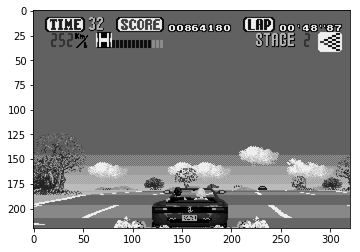

In [11]:
plt.imshow(seqimg[1002],cmap='gray', vmin=0, vmax=255)

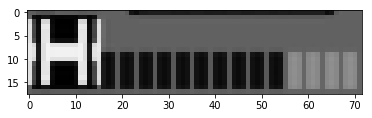

In [12]:
plt.imshow(seqimg[1000][21:39,64:136],cmap='gray', vmin=0, vmax=255)

In [13]:
seqcmds[1002]

[1, 0, 1, 0]

In [14]:
with open('./img_new.pkl','wb') as f:
    pickle.dump(seqimg, f)

with open('./comando_new.pkl','wb') as f:
    pickle.dump(seqcmds, f)

# End of movement recording

In [15]:
freio = pd.DataFrame(seqcmds,columns=['direcao','marcha','acelera','freio'])

In [16]:
freio.describe()

,direcao,marcha,acelera,freio
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,-0.016857,0.014714,0.845857,0.022714
std,0.667453,0.136016,0.361111,0.149002
min,-1.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000
